[참고 사이트](https://velog.io/@yelim421/Intent-Classification-o9jdf690)

# 모델

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 44.5 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-tegb3ss3
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-tegb3ss3
  Resolved https://github.com/ssut/py-hanspell.git to commit 8e993cf46f97f9d665c15633a0fc78ac1b727713
  Preparing metadata (setup.py) ... done
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4870 sha256=89f59ee92ed82e746e74a3949c40355bbcdf91dcc3ec2764ea94456c67ca7f2c
  Stored in directory: /tmp/pip-ephem-wheel-cache-lh2tv6_a/wheels/3f/a5/73/e4d2806ae141d274fdddaabf8c0ed79be9357d36bfdc99e4b4
Successfully built py-hanspell


In [ ]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing

from tqdm import tqdm

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AntHouse/0.Data/qa_final.csv')
df['intent'] =df['A'].str.split().str.get(0).str.slice(0,-1)+'_'+df['A'].str.split().str.get(2).str.slice(0,-1)

In [ ]:
df

,Q,A,intent
0,BGF리테일 당좌비율 궁금해,BGF리테일의 2021년도 당좌비율은 68.85(%)입니다.,BGF리테일_당좌비율
1,비지에프리테일 당좌비율 알려줘,BGF리테일의 2021년도 당좌비율은 68.85(%)입니다.,BGF리테일_당좌비율
2,비지에프리테일 당좌비율 궁금해,BGF리테일의 2021년도 당좌비율은 68.85(%)입니다.,BGF리테일_당좌비율
3,비지에프리테일 당좌비율 얼마야,BGF리테일의 2021년도 당좌비율은 68.85(%)입니다.,BGF리테일_당좌비율
4,비지에프리테일 당좌비율 어때,BGF리테일의 2021년도 당좌비율은 68.85(%)입니다.,BGF리테일_당좌비율
...,...,...,...
100795,휠라홀딩 주당배당금 얼마야,"휠라홀딩스의 2022년도 주당배당금은 1,317(원)입니다.",휠라홀딩스_주당배당금
100796,휠라홀딩 주당배당금 궁금해,"휠라홀딩스의 2022년도 주당배당금은 1,317(원)입니다.",휠라홀딩스_주당배당금
100797,휠라홀딩 주당배당금 알려줘,"휠라홀딩스의 2022년도 주당배당금은 1,317(원)입니다.",휠라홀딩스_주당배당금
100798,휠라홀딩스 주당배당금 어때,"휠라홀딩스의 2022년도 주당배당금은 1,317(원)입니다.",휠라홀딩스_주당배당금


In [ ]:
index_inputs = np.load('/content/drive/MyDrive/AntHouse/3.Modeling/X_train.npy',allow_pickle=True)
X_train = index_inputs

In [ ]:
X_train[342]

array([ 43, 165,  24,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0],
      dtype=int32)

In [ ]:
# vocab_size = len(tokenizer.word_index)+1
vocab_size=601

In [ ]:
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(df['A'])

y_train = idx_encode.transform(df['A'])

label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))

In [ ]:
label_idx

In [ ]:
idx_label = {}
for key, value in label_idx.items():
  idx_label[value] = key

In [ ]:
idx_label

{0: 'BGF리테일의 2021년도 당좌비율은 68.85(%)입니다.',
 1: 'BGF리테일의 2021년도 배당성향은 35.10(%)입니다.',
 2: 'BGF리테일의 2021년도 부채비율은 220.81(%)입니다.',
 3: 'BGF리테일의 2021년도 시가배당률은 2.06(%)입니다.',
 4: 'BGF리테일의 2021년도 유보율은 4,439.53(%)입니다.',
 5: 'BGF리테일의 2022년도 BPS은 55,268(원)입니다.',
 6: 'BGF리테일의 2022년도 EPS는 11,332(원)입니다.',
 7: 'BGF리테일의 2022년도 PBR은 3.45(배)입니다.',
 8: 'BGF리테일의 2022년도 PER은 16.85(배)입니다.',
 9: 'BGF리테일의 2022년도 ROE는 22.21(%)입니다.',
 10: 'BGF리테일의 2022년도 당기순이익은 1,963(억원)입니다.',
 11: 'BGF리테일의 2022년도 매출액은 76,042(억원)입니다.',
 12: 'BGF리테일의 2022년도 순이익률은 2.58(%)입니다.',
 13: 'BGF리테일의 2022년도 영업이익률은 3.45(%)입니다.',
 14: 'BGF리테일의 2022년도 영업이익은 2,626(억원)입니다.',
 15: 'BGF리테일의 2022년도 주당배당금은 3,307(원)입니다.',
 16: 'BNK금융지주의 2021년도 매출액은 55,807(억원)입니다.',
 17: 'BNK금융지주의 2021년도 배당성향은 22.97(%)입니다.',
 18: 'BNK금융지주의 2021년도 부채비율은 1,154.86(%)입니다.',
 19: 'BNK금융지주의 2021년도 순이익률은 14.95(%)입니다.',
 20: 'BNK금융지주의 2021년도 시가배당률은 6.67(%)입니다.',
 21: 'BNK금융지주의 2021년도 영업이익률은 19.57(%)입니다.',
 22: 'BNK금융지주의 2021년도 유보율은 527.74(%)입니다.',
 23: 'BNK금융지주의 2022년도 BPS은 30

In [ ]:
y_train

array([1712, 1712, 1712, ..., 2795, 2795, 2795])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size=0.2)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 64))
model.add(LSTM(256))
model.add(Dense(len(label_idx), activation='softmax'))

In [ ]:
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size=0.2)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history=model.fit(X_tr, y_tr,validation_data=(X_val,y_val), epochs=100, batch_size=64) 

Epoch 1/100
1260/1260 [==============================] - 14s 6ms/step - loss: 7.3036 - acc: 0.0070 - val_loss: 6.5722 - val_acc: 0.0208
Epoch 2/100
1260/1260 [==============================] - 7s 5ms/step - loss: 5.8337 - acc: 0.0689 - val_loss: 5.1585 - val_acc: 0.1422
Epoch 3/100
1260/1260 [==============================] - 7s 5ms/step - loss: 4.5363 - acc: 0.2501 - val_loss: 4.0231 - val_acc: 0.3491
Epoch 4/100
1260/1260 [==============================] - 7s 5ms/step - loss: 3.3884 - acc: 0.5012 - val_loss: 2.9214 - val_acc: 0.6235
Epoch 5/100
1260/1260 [==============================] - 7s 5ms/step - loss: 2.5696 - acc: 0.6754 - val_loss: 2.3233 - val_acc: 0.7268
Epoch 6/100
1260/1260 [==============================] - 7s 5ms/step - loss: 2.0532 - acc: 0.7753 - val_loss: 1.9057 - val_acc: 0.8051
Epoch 7/100
1260/1260 [==============================] - 7s 5ms/step - loss: 1.6761 - acc: 0.8444 - val_loss: 1.5871 - val_acc: 0.8661
Epoch 8/100
1260/1260 [==============================]

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

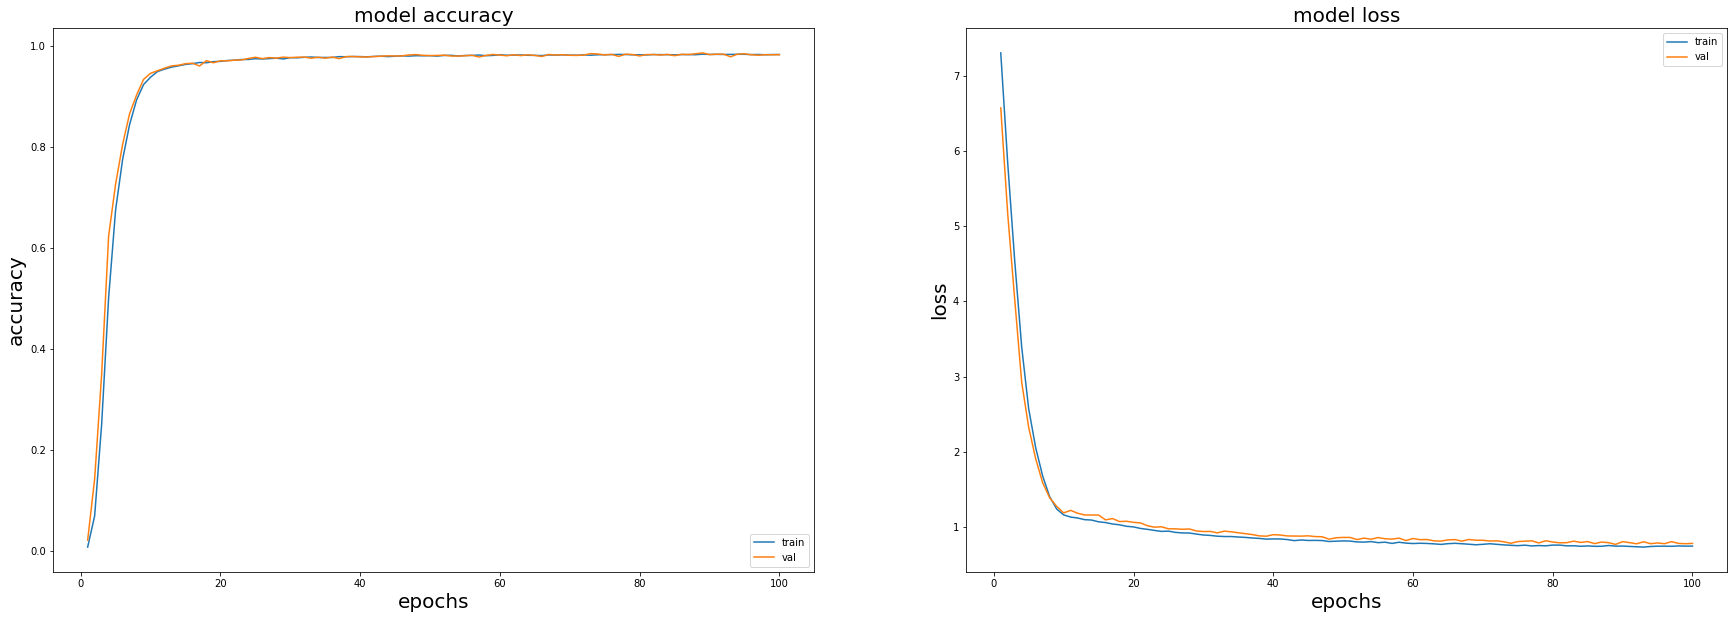

In [ ]:
plt.figure(figsize=(30,10))
epochs = range(1, len(history.history['acc']) + 1)
plt.subplot(1,2,1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy',fontsize=20)
plt.ylabel('accuracy',fontsize=20)
plt.xlabel('epochs',fontsize=20)
plt.legend(['train', 'val'], loc='lower right')
# plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.subplot(1,2,2)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss',fontsize=20)
plt.ylabel('loss',fontsize=20)
plt.xlabel('epochs',fontsize=20)
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
okt = Okt()
max_len=15


In [ ]:
def question_processing(sentences):
  inputs = []
  for sentence in sentences : 
    sentence = okt.morphs(sentence)
    encoded = tokenizer.texts_to_sequences([sentence])
    inputs.append(encoded[0])
  padded_inputs = pad_sequences(inputs, maxlen=max_len, padding='post')
  return padded_inputs

In [ ]:
def word_clean(df):
    from hanspell import spell_checker
    import re
    from tqdm import tqdm
    CHANGE_FILTER = re.compile("([~!?\"':;&)(])") #제외할 문자
    okt = Okt()
    X_train = []
    for sentence in tqdm(df,desc='전처리 중'):
        sentence = re.sub(CHANGE_FILTER, "", sentence) #문자 제외
        ok = spell_checker.check(sentence) # 맞춤법 확인
        sentence = ok.checked #바꾼 문자로 변경
        clean_words = []
        for word in okt.pos(sentence):
            if word[1] in ['Noun', 'Modifier', 'Alpha']: #명사, 관형사(가끔 나와서), 영어
                 clean_words.append(word[0]) #찾아진 것 중 단어만 추가
        sentence = ' '.join(clean_words)
        X_train.append(sentence)
    return X_train


def pred(input_text):
    input_sentence = question_processing(word_clean([input_text]))
    prediction = np.argmax(model.predict(input_sentence), axis = 1)
    for p in prediction:
        print(idx_label[p])

In [ ]:
import pickle
with open('/content/drive/MyDrive/AntHouse/3.Modeling/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
input_sentence = question_processing(word_clean(['유한양행 당기순이익?']))
prediction = np.argmax(model.predict(input_sentence), axis = 1)
# pred = []
for p in prediction: 
    # pred.append(idx_label[p])
    print(idx_label[p])


전처리 중: 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]


1/1 [==============================] - 0s 23ms/step
유한양행의 2022년도 당기순이익은 769(억원)입니다.


In [ ]:

pred('씨제이 per 보고싶어')

전처리 중: 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

1/1 [==============================] - 0s 21ms/step


CJ의 2022년도 PER은 9.27(배)입니다.


In [ ]:
input_sentence = question_processing(['유한양행의 당기순이익은?'])

prediction = np.argmax(model.predict(input_sentence), axis = 1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
for p in prediction:
  print(idx_label[p])

유한양행의 2022년도 당기순이익은 769(억원)입니다.


In [ ]:
model.save('/content/drive/MyDrive/AntHouse/3.Modeling/intent_epo100_bs64.h5')

In [ ]:
import tensorflow as tf
load_model = tf.keras.models.load_model('/content/drive/MyDrive/AntHouse/3.Modeling/intent_epo100_bs64.h5')